<a href="https://colab.research.google.com/github/nana-hyun/AI_experience_lab/blob/main/ML%20%26%20DL%20Basic/Lecture_04_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Multivariable linear regression

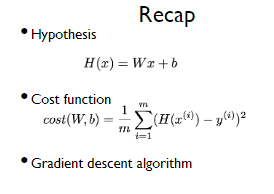

앞선 강의에서는 one variable - one feature 였다면,

이번에는 변수가 많은 경우에 linear regression을 어떻게 진행할 지 알아보고자 한다.

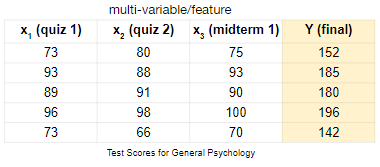

다음과 같이 quiz에 대해 3개의 변수가 주어진다면, 어떻게 예측을 할 수 있을까?

**Hypothesis**

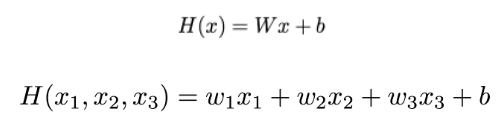

hypothesis를 위와 같이 쓸 수 있다면 cost function은 어떻게 만들까?

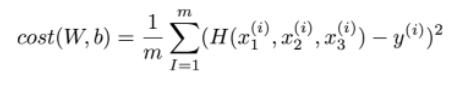

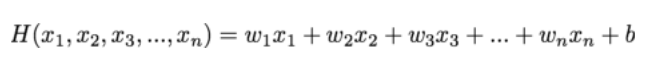

변수가 n개라면 위와 같이 쓸 수 있을 것이다.


이러한 경우, 계산을 간단히 하기 위해 행렬곱의 특성을 활용한다.

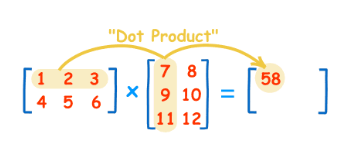

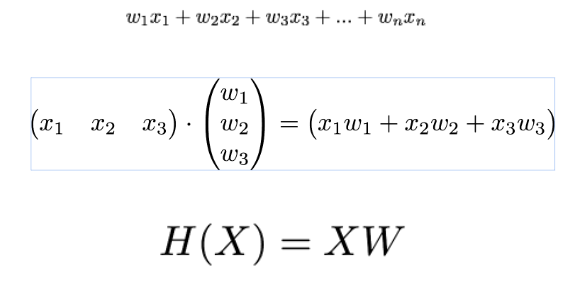



## Lab 4

In [1]:
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

In [ ]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)


In [ ]:

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [ ]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


In [2]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [ ]:

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b


In [ ]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


In [ ]:
# in tf2

import tensorflow as tf
import numpy as np

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]
tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3))  # input_dim=3 gives multi-variable regression
tf.model.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default
# advanced reading https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:

history = tf.model.fit(x_data, y_data, epochs=100)

y_predict = tf.model.predict(np.array([[72., 93., 90.]]))
print(y_predict)

**Slicing**

In [ ]:
nums = list(range(5))

print(nums)
print(nums[2:4])
print(nums[2:])
print(nums[:])
print(nums[:-1])
nums[2:4] = [8,9]
print(nums)

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


In [ ]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

In [ ]:
xy = np.loadtxt('/content/drive/MyDrive/data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [ ]:
# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)


[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [ ]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

In [ ]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('/content/drive/MyDrive/data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [ ]:

tf.model = tf.keras.Sequential()
# activation function doesn't have to be added as a separate layer. Add it as an argument of Dense() layer
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3, activation='linear'))
# tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.summary()

tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
history = tf.model.fit(x_data, y_data, epochs=2000)
# Ask my score
print("Your score will be ", tf.model.predict([[100, 70, 101]]))
print("Other scores will be ", tf.model.predict([[60, 70, 110], [90, 100, 80]]))

# 5. Logistic regression classification

**Classification**

특히 binary의 경우에서, 0과 1로 encoding할 수 있다.

* Spam Detection : Spam(1) or ham(0)
* Facebook feed : show(1) or hide(0)
* Credit Card Fraudulent Transaction detection : legitimate(0)/fraud(1)

*Radiology*

Malignant tumor vs Benign tumor

*Finance*

When to sell vs When to buy

만약에, study hours에 따라 Pass(1) / Fail(0)이 구분되는 경우,

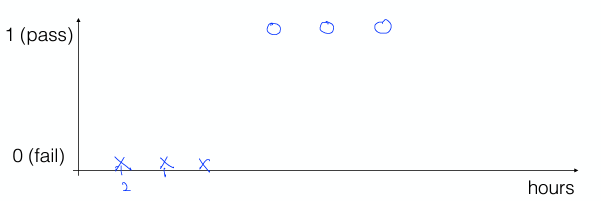

위와 같은 그래프가 그려진다고 해보자.

우리가 배운 linear regression을 이용해 classification할 수 있는데,

**H(x) = Wx + b**

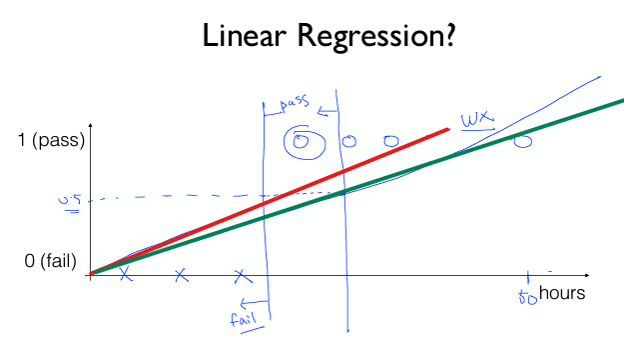

빨간색 선을 그려서 0.5를 기준으로 pass와 fail을 나눌 수 있겠지만,

만일 pass의 instance가 많아져 초록색과 같이 선이 그려지게 되면, 0.5의 위치가 뒤로 밀려나게 되면서 pass임에도 불구하고 fail로 분류되는 경우가 발생한다.


게다가 우리는 0과 1의 값을 가지는데, linear regression의 hypothesis는 1보다 크거나, 0보다 작은 값을 가질 수 있다.

ex) 

x = 100일때, W = 0.5, b = 0 이라고 한다면,

H(x) = 50의 값을 가진다.

이러한 경우를 보완해주기 위해 우리는 Logistic Hypothesis를 이용한다.



## hypothesis

기존의 H(x) = Wx + b를 z라고 두고, 범위가 0~1로 제한되어 있는 g(z)라는 함수를 새로 만들어 보자.

이때 이용할 g(z)는 **sigmoid** 함수 이다.

**sigmoid**

: curved in two directions, like the letter "S", or the Greek ς (sigma)

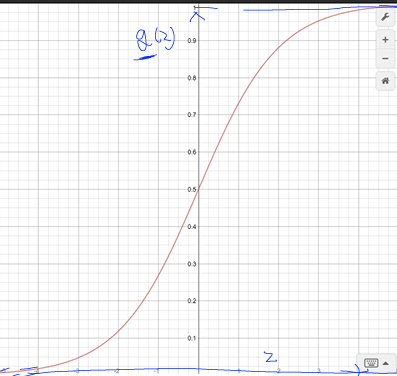

위 함수를 logistic function, sigmoid function이라 한다.

식은 다음과 같다.

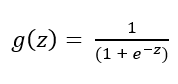

이를 이용해 hypothesis를 다시 작성하면,

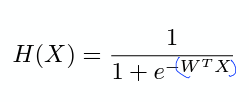

위와 같은 식을 가진다.

W transpose의 의미는, X행렬과 행렬곱이 안되는 경우, 즉 x shape = (1, D)인데, W = (1, D) 인 경우에 transpose하여 사용하면 된다.

그렇지 않을 경우 W를 transpose하지 않아도 무방하다.


## Cost function



cost function이 linear regression의 경우 다음과 같이 보여졌었다. 


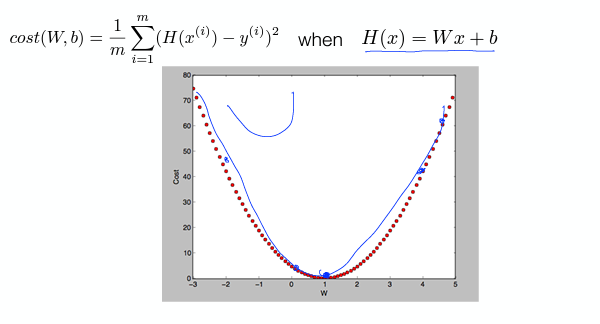



그렇다면 logistic regression의 경우 cost function이 어떻게 그려지게 될까?

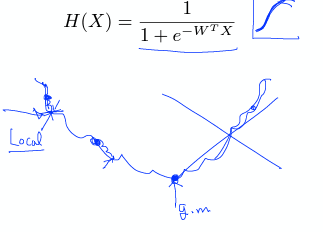

위와 같은 그림이 그려지는데, 이때 local minimum들 때문에, 시작점에 따라 최솟값이 달라지게 된다.

이렇게 되면 운이 좋게 진짜 global minimum에 도달하지 않는 이상 local minimum을 global minimum이라 생각할 수도 있게 된다.

따라서 이를 위해 새로운 cost함수를 만들 필요가 있다.

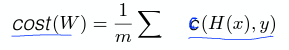

이때 c(H(x),y)는 y = 1일 때와 y = 0일때로 나눠서 다르게 작성할 수 있다.

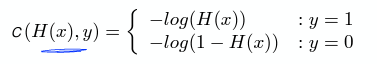



**y=1일때**

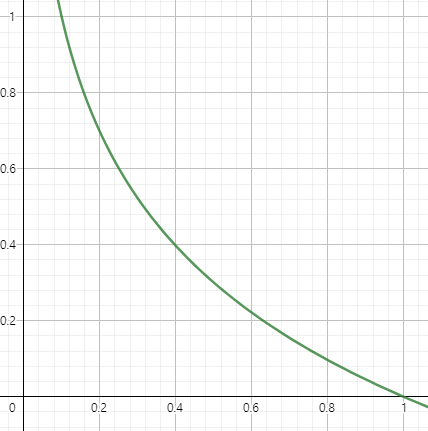

* H(x) = 1 -> cost(1) =0
* H(x) = 0 -> cost(0) =inf

**y=0일때**

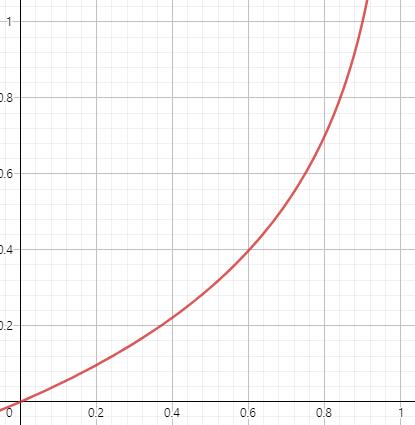


* H(x) = 0 -> cost(0) =0
* H(x) = 1 -> cost(1) =inf


우리가 코딩을 할 때에는 저렇게 식이 나눠져있으면 코드를 작성하기에 굉장히 어렵기 때문에, 식을 하나로 합쳐주면 다음과 같은 식이 된다.

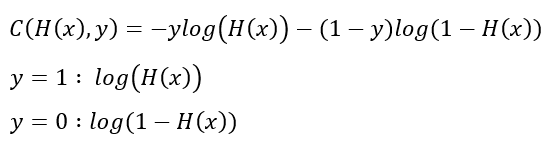

## Gradient descent alogrithm




Minimize cost - gradient descent alogrithm

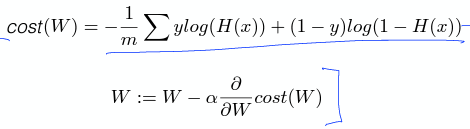

cost함수만 다르고, gradient descent algorithm은 똑같이 적용하면 된다.



In [ ]:
# in tf1

cost = tf.reduce_mean(-tf.reduce_suum(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis)))

# Minimize

a = tf.Variable(0.1) #learning rate
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)


## Lab 5

In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [ ]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [ ]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

In [ ]:
import tensorflow as tf

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))
# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

In [ ]:
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=5000)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('/content/drive/MyDrive/data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

(759, 8) (759, 1)


In [ ]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

In [ ]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('/content/drive/MyDrive/data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

tf.model = tf.keras.Sequential()
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=x_data.shape[1], activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])
tf.model.summary()

(759, 8) (759, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = tf.model.fit(x_data, y_data, epochs=500)

# accuracy!
print("Accuracy: {0}".format(history.history['accuracy'][-1]))

# predict a single data point
y_predict = tf.model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])
print("Predict: {0}".format(y_predict))

# evaluating model
evaluate = tf.model.evaluate(x_data, y_data)
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))

# 6. Softmax classifier

logistic regression을 이용하여 다중 분류를 하기 위해서 이용하는 것이 softmax classifier이다.

softmax 함수는 여러 개의 연산결과를 정규화해 모든 class의 확률 값의 합을 1로 만드는 것이다.

우리는 logistic regression에서, input값 x에 가중치 W를 계산한 값을 z로 변환하여 sigmoid함수에 적용했다.

이를 통해 y_hat이라는 0~1 사이의 예측값을 가질 수 있었다.

여기서 y_hat은 가설함수를 통해 예측한 값이며, y가 실제 값이라고 할 수 있다.

**y_hat = H(x)**

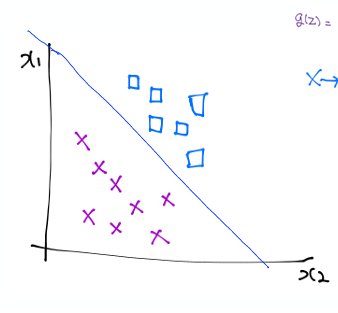

logistic regression을 binary classification에 적용하면, 다음과 같이 선을 그릴 수가 있을 것이다.

multinomial classification의 경우를 한번 보자.

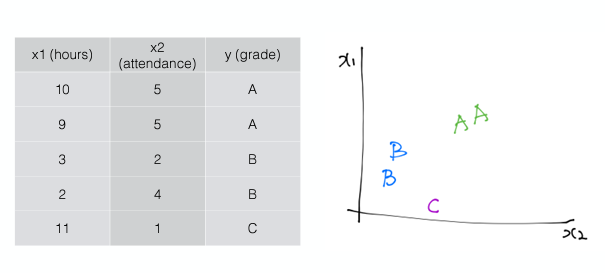


예를 들어 grade를 다음과 같이 A,B,C로 나눌 수 있다고 하자.

multinomial classification에서는 3개의 binary classification을 이용해 나눌 수 있을 것이다.

* A or not
* B or not
* C or not

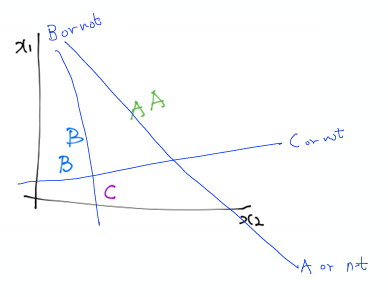

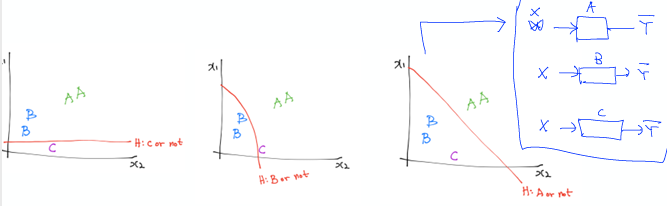

이렇게 되면 각각의 y_hat 예측값을 가지게 될 것이다.

이제 행렬 곱을 사용해 이를 간단하게 만들 수 있다.

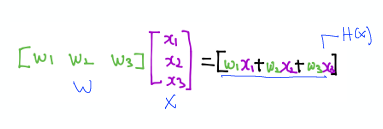

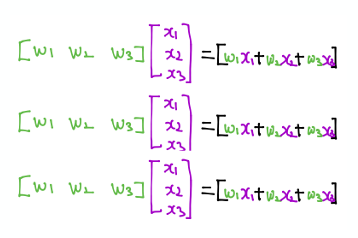

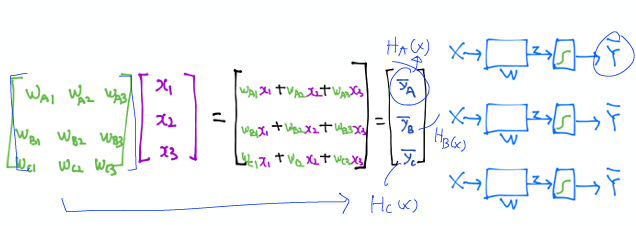

행렬 곱을 통해 각각의 y_hat으로 구성되는 벡터를 만들어 낼 수 있다.

그렇다면 이에 대한 sigmoid는 어떻게 만들어나가야할까?



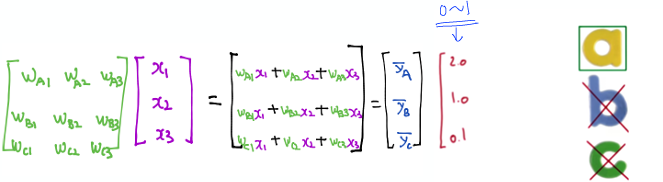

위와같이 점수로 결과가 나왔을 때, 우리는 2.0이라는 값을 가지는 a로 예측할 수 있을 것이다.

그렇다면 이 값을 0~1 사이로, 합하면 1이 되게끔 확률로 만들기 위해서 softmax function을 사용하고자 한다.

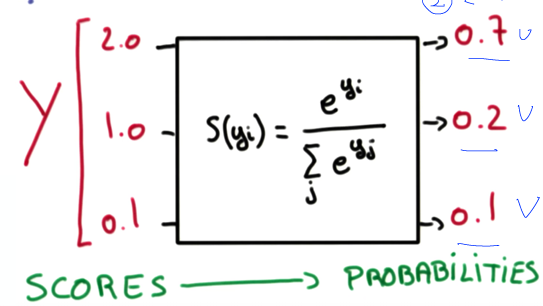

이렇게 확률로 변환을 해서 argmax를 사용하여 one-hot encoding 방식으로 변경해주면 될 것이다.

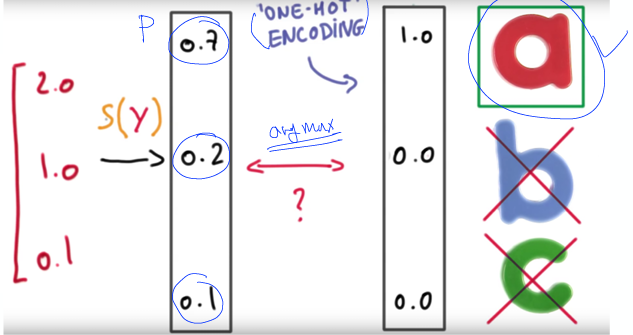

## cost function

**corss-entropy**

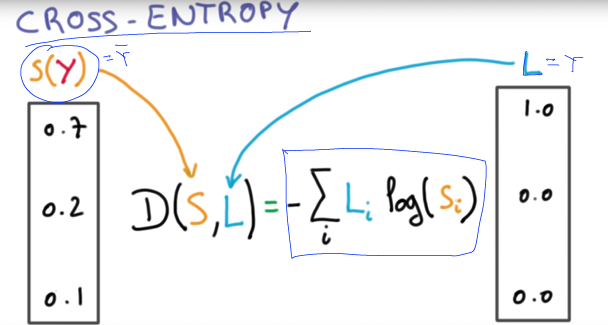

S에는 y_hat의 값이 들어가고, L에는 실제 Y값이 들어가게 된다.

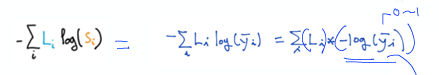

-log(x)의 그래프는 다음과 같고, y_hat은 0~1 사이의 값이다.

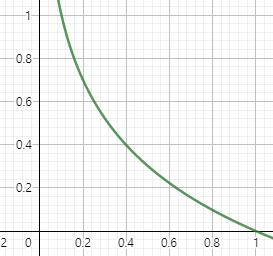

예를 들어 확인해보자.

A와 B로 나뉘는 class 중, L이 B를 true라고 가질 때, y_hat또한 B를 true라고 예측하거나, A를 true라고 예측한 경우 cost function 값을 알아보면, 다음과 같은 결과를 가진다.

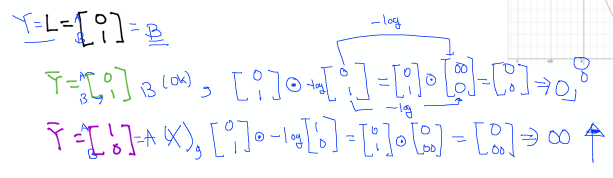

반대로 L이 A를 true라고 할 때도 마찬가지이다.

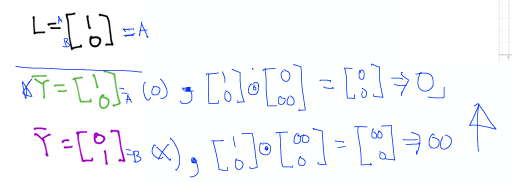

C(H(x), y) = -ylog(H(x)) - (1-y)log(1-H(x))인
logistic cost와 cross entropy는 binary 부분에서 생각하면, 같은 식이라고 할 수 있다.

두 개의 예측, 결과만 있기 때문에, cross entropy의 식을 다시 작성하면,

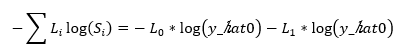

이때, L은 y로, y_hat은 H(x)로 작성이 가능하다.

y는 0 아니면 1로 작성되므로, 뒤의 y는 (1-y)로, 쓸 수 있으며, H(x) 또한 합이 1이기 때문에 1-H(x)로 작성할 수 있다.

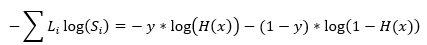 

따라서 식이 같은 것을 확인할 수 있다.

여러개의 training set이 있을 때에는, 거리(차이)의 평균을 구해서 cost function을 구할 수 있다.

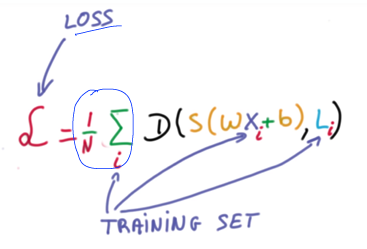

**gradient descent**

똑같이 cost function의 미분을 통해 구한다.



## Lab 6

In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [ ]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)

    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 3.9307914
200 0.49251726
400 0.38279027
600 0.28668967
800 0.23393735
1000 0.21145627
1200 0.19295461
1400 0.17741008
1600 0.16414917
1800 0.15269807
2000 0.14270976
--------------
[[2.6234915e-03 9.9736708e-01 9.3491481e-06]] [1]
--------------
[[0.88711405 0.09701869 0.01586726]] [0]
--------------
[[5.4152416e-09 2.7104167e-04 9.9972898e-01]] [2]
--------------
[[2.6234915e-03 9.9736708e-01 9.3491481e-06]
 [8.8711405e-01 9.7018667e-02 1.5867241e-02]
 [5.4152416e-09 2.7104167e-04 9.9972898e-01]] [1 0 2]


In [ ]:
import tensorflow as tf
import numpy as np

x_raw = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_raw = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_data = np.array(x_raw, dtype=np.float32)
y_data = np.array(y_raw, dtype=np.float32)

nb_classes = 3

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=4, units=nb_classes, use_bias=True))  # use_bias is True, by default

# use softmax activations: softmax = exp(logits) / reduce_sum(exp(logits), dim)
tf.model.add(tf.keras.layers.Activation('softmax'))

# use loss == categorical_crossentropy
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=2000)

In [ ]:
print('--------------')
# Testing & One-hot encoding
a = tf.model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

print('--------------')
b = tf.model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

print('--------------')
# or use argmax embedded method, predict_classes
c = tf.model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = np.argmax(c,axis=1)
print(c, c_onehot)

print('--------------')
all = tf.model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
all_onehot = np.argmax(all,axis=1)
print(all, all_onehot)

--------------
[[1.0689961e-02 9.8930025e-01 9.8375622e-06]] [1]
--------------
[[0.80340624 0.17841025 0.01818344]] [0]
--------------
[[1.7541003e-08 3.7957795e-04 9.9962044e-01]] [2]
--------------
[[1.0689961e-02 9.8930025e-01 9.8375449e-06]
 [8.0340642e-01 1.7841016e-01 1.8183433e-02]
 [1.7541005e-08 3.7957795e-04 9.9962044e-01]] [1 0 2]


In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('/content/drive/MyDrive/data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:", Y_one_hot)

'''
one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)
'''

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')



(101, 16) (101, 1)
one_hot: Tensor("one_hot_1:0", shape=(None, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape_1:0", shape=(None, 7), dtype=float32)


In [ ]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=tf.stop_gradient([Y_one_hot])))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
                                        
        if step % 100 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

In [ ]:
import tensorflow as tf
import numpy as np

# Predicting animal type based on various features
xy = np.loadtxt('/content/drive/MyDrive/data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)


In [ ]:

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=16, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_one_hot, epochs=1000)

# Single data test
test_data = np.array([[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]) # expected prediction == 3 (feathers)
print(tf.model.predict(test_data), np.argmax(tf.model.predict(test_data),axis=1))

# Full x_data test
x_data_pred = tf.model.predict(x_data)
pred = np.argmax(x_data_pred,axis = 1)
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))